In [1]:
KK0

'文档起始位'

# Daylight的smiles手册

[Daylight’s SMILES Theory Manual](http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)

**smi示例**:

SMILES| Name| SMILES| Name |
---|---|---|---  
CC | ethane | [OH3+] | hydronium ion  
O=C=O  | carbon dioxide(二氧化碳) | [2H]O[2H] | deuterium oxide(氧化氘)  
C#N | hydrogen cyanide(氰化氢) | [235U] | uranium-235(铀-235) 
CCN(CC)CC | triethylamine(三乙胺) | F/C=C/F | E-difluoroethene  
CC(=O)O | acetic acid | F/C=C\F | Z-difluoroethene  
C1CCCCC1 | cyclohexane | N[C@@H](C)C(=O)O | L-alanine(L-丙氨酸) 
c1ccccc1  | benzene(苯) | N[C@H](C)C(=O)O | D-alanine  

Reaction SMILES(化学反应式)| Name |
---|---  
[I-].[Na+].C=CCBr>>[Na+].[Br-].C=CCI | displacement reaction  
(C(=O)O).(OCC)>>(C(=O)OCC).(O) | intermolecular esterification(分子间酯化)  
  

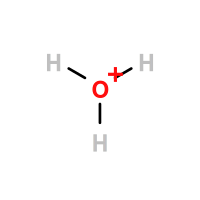

In [2]:
smile('[OH3+]')

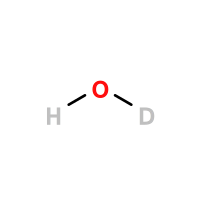

In [3]:
smile('[2H]O[H]')

In [4]:
try:
    readstring('smiles','NC@@HC(=O)O') 
except OSError as e:
    print(e)

Failed to convert 'NC@@HC(=O)O' to format 'smiles'


## 规范化(Canonicalization)

**通用smil**(generic): 只显示原子和键, 不包含手性指示(chiral indications)和同位素信息;  
**独特smil**(unique): 通用smiles经过规范化处理, 一个结构只能对应一个smiles字符串;  
**异构smil**(isomeric): 包含手性或者同位素的smi;  
**绝对smil**(absolute): 经过规范化处理的异构smi;

Input SMILES| Unique SMILES   
---|---  
 OCC | CCO
[CH3][CH2][OH]  | CCO  
C-C-O | CCO  
C(O)C | CCO  
OC(=O)C(Br)(Cl)N | NC(Cl)(Br)C(=O)O  
ClC(Br)(N)C(=O)O | NC(Cl)(Br)C(=O)O  
O=C(O)C(N)(Br)Cl | NC(Cl)(Br)C(=O)O  

## smi的规则说明(Specification Rules)

**一般约定**: 字符串内没有空格;可以绘制带H或者不带H的结构图;芳香族可以指定为库开勒形式;  
**五个基本规则**: atoms, bonds, branches, ring closures(闭合), and disconnections(断开);  
**异构体规则**: isomeric smi;

### 原子规则(Atoms)

非氢元素要用`[]`括起来;  
有机子集中的元素(organic subset)`B, C, N, O, P, S, F, Cl, Br, I`可以不用`[]`括起来;  
有机子集中的元素如果没有被`[]`括起来表示附着H, $B_3, C_4, N_{3,5}, O_2, P_{3,5}, S_{2,4,6}, X_1$, X是halogens;  
脂肪链(aliphatic)中的元素用大写字母表示, 芳环中的元素(aromatic)用小写字母表示;

**C** |  methane  |  (CH4)  
------|-----------|---  
**P** |  phosphine  |  (PH3)  
**N** |  ammonia  |  (NH3)  
**S** |  hydrogen sulfide  |  (H2S)  
**O** |  water  |  (H2O)  
**Cl** |  hydrochloric acid  |  (HCl)  

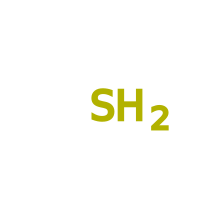

In [5]:
smile('S')

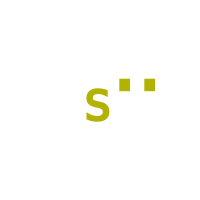

In [6]:
smile('[S]')

在`[]`内可以明确指出氢原子的个数([NH3])和形式电荷的个数(formal charges)

  smi|含义
---|---  
[ **H+** ]  |  proton  
[ **Fe+2** ]  |  iron (II) cation  
[ **OH-** ]  |  hydroxyl anion  
[ **Fe++** ]  |  iron (II) cation  
[ **OH3+** ]  |  hydronium cation  
[ **NH4+** ]  |  ammonium cation  
 

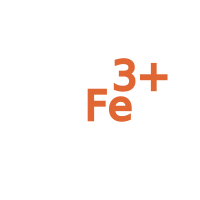

In [7]:
smile('[Fe+3]') #smile('[Fe+++]')

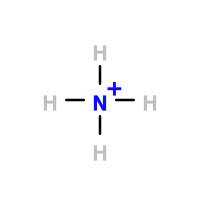

In [8]:
smile('[NH4+]')

### 键规则(Bonds)

`-, =, **#** , :`分别表示Single, double, triple, aromatic bonds(单键和芳香键可以省略);

**CC** |  ethane  | (CH3CH3)  
---|---|---  
**C=O** |  formaldehyde  | (CH2O)  
**C=C** |  ethene  | (CH2=CH2)  
**O=C=O** |  carbon dioxide  | (CO2)  
**COC** |  dimethyl ether  | (CH3OCH3)  
**C#N** |  hydrogen cyanide  | (HCN)  
**CCO** |  ethanol  | (CH3CH2OH)  
**[H][H]** |  molecular hydrogen  |  (H2)  

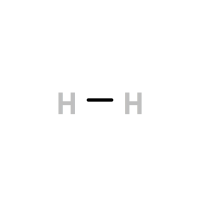

In [9]:
# H2
smile('[H][H]')

线性结构可以有多种smi表示: `6-hydroxy-1,4-hexadiene(6羟基1,4己二烯)`

Structure| Valid SMILES 
---------|---  
                |C=CCC=CCO
CH2=CH-CH2-CH=CH-CH2-OH|C=C-C-C=C-C-O 
                |OCC=CCC=C(链顺序)
 

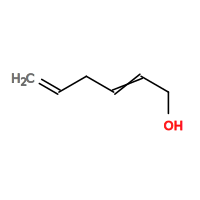

In [10]:
smile('OCC=CCC=C')

### 支链(Branches)

支链(branch)使用`()`括起来:  

**Triethylamine** | **Isobutyric acid** | **3-propyl-4-isopropyl-1-heptene** 
---|---|---  
CCN(CC)CC | CC(C)C(=O)O | C=CC(CCC)C(C(C)C)CCC  
![theory1.gif](http://www.daylight.com/dayhtml/doc/theory/theory1.gif) | ![theory1.gif](http://www.daylight.com/dayhtml/doc/theory/theory2.gif) | ![theory3.gif](http://www.daylight.com/dayhtml/doc/theory/theory3.gif)  

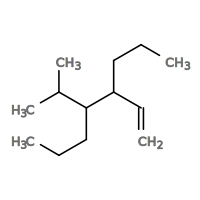

In [11]:
smile('C=CC(CCC)C(C(C)C)CCC')

### 环状结构(Cyclic)

环状结构要拆分成链式结构, 并用数字指定环接口(拆分点): ![theory4.gif](http://www.daylight.com/dayhtml/doc/theory/theory4.gif)  

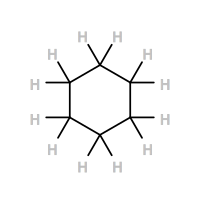

In [12]:
# Cyclohexane
smile('C1CCCCC1',make3d=1)

开环后的链式结构可以有多种smi表示:![](http://www.daylight.com/dayhtml/doc/theory/theory5.gif)

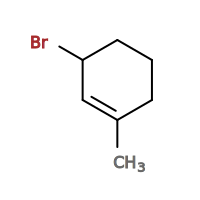

In [13]:
# 1-methyl-3-bromo-cyclohexene-1
smile('CC1=CC(Br)CCC1')

环状结构可以有不同的开环点

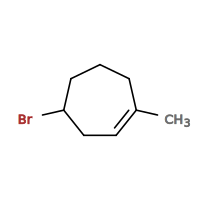

In [14]:
# 在Br处开环
smile('BrC1CCCC(C)=CC1')

不同环中的开环数字标识可以被重用: ![theory7.gif](http://www.daylight.com/dayhtml/doc/theory/theory7.gif)  

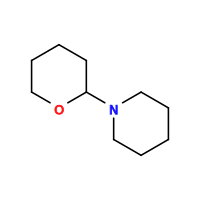

In [15]:
smile('O1CCCCC1N1CCCCC1') #N1CCCCC1为另一个环, 两个`1`成对配合
# smile('O1CCCCC1N2CCCCC2')

*立体结构开环*: 一个数字标识可以表示多个环接口(cubane): ![theory6.gif](http://www.daylight.com/dayhtml/doc/theory/theory6.gif)  

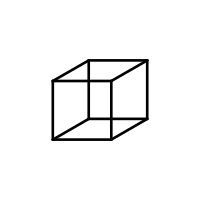

In [16]:
smile('C12C3C4C1C5C4C3C25')

### 断裂式结构(disconnected)

断式化合物(disconnected compounds)使用$\large.$分割, 离子或配体的顺序(ions, ligands)可以在结构中任意放置: ![theory8.gif](http://www.daylight.com/dayhtml/doc/theory/theory8.gif)  

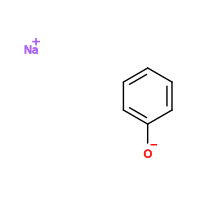

In [17]:
# sodium phenoxide(苯酚钠
smile('c1cc([O-].[Na+])ccc1')

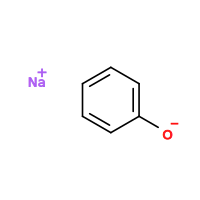

In [18]:
smile('c1ccccc1[O-].[Na+]')

## 异构smi(isomeric)

描述**顺反异构**和**对映异构**(手性)

### 同位素规则(isotopic)

同位素规则: 在元素符号前面添加数字, 并将数字和元素用[]一起括起来:

Smiles | Name 
---|---  
[ **12C** ]  | carbon-12  
[ **13C** ]  | carbon-13  
[ **C** ] | carbon (unspecified mass)  
[ **13CH4** ] | C-13 methane  

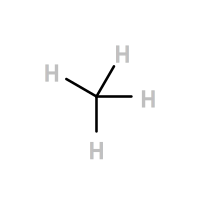

In [19]:
smile('[13CH4]')

### 顺反异构

`/和\` 用于标识定向键(directional bonds), E- 和 Z-1,2-difluoroethene:

反式异构|顺式异构
--------|---  
F/C=C/F | F/C=C\F  
F\C=C\F | F\C=C/F  
![theory9.gif](http://www.daylight.com/dayhtml/doc/theory/theory9.gif) | ![theory10.gif](http://www.daylight.com/dayhtml/doc/theory/theory10.gif)  

指定局部异构:

![theory11.gif](http://www.daylight.com/dayhtml/doc/theory/theory11.gif) | ![theory12.gif](http://www.daylight.com/dayhtml/doc/theory/theory12.gif)  
---|---  
F/C=C/C=C/C | F/C=C/C=CC  
(completely specified) | (partially specified)    

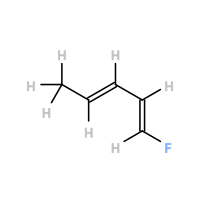

In [20]:
smile('F/C=C/C=C/C',make3d=1)

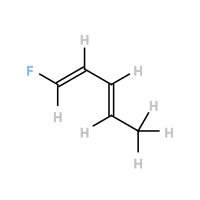

In [21]:
smile(reverse_string('F/C=C/C=C/C'),make3d=1)

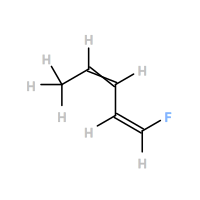

In [22]:
smile('F/C=C/C=CC',make3d=1)

### 四面体中心附近的构型(Configuration Around Tetrahedral Centers)

互为镜像关系的结构称为对映异构体(enantiomers), 中心原子周围的四个原子互不相同时, 该结构有两种构型;  
手性指定符用`@,@@`表示;

指定手性 | 指定手性
---|---  
NC(C)(F)C(=O)O | N[C@](C)(F)C(=O)O  
NC(F)(C)C(=O)O | N[C@@](F)(C)C(=O)O  
![13](http://www.daylight.com/dayhtml/doc/theory/theory13.gif) | ![14](http://www.daylight.com/dayhtml/doc/theory/theory14.gif)  


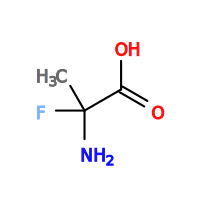

In [23]:
smile('NC(C)(F)C(=O)O',make3d=0)

In [24]:
# smile('NC@(F)C(=O)O')

### General Chiral Specification

正方形平面, 三角双螺旋, 八面体..

## smi约定

### Hydrogens

四种需明确指定H的情形:

* charged hydrogen, i.e. a proton, `[H+]`;  
* hydrogens connected to other hydrogens, e.g., molecular hydrogen, `[H][H]`;  
* hydrogens connected to other than one other atom, e.g., bridging hydrogens; and  
* isotopic hydrogen specifications, e.g. in heavy water, `[2H]O[2H]`. 

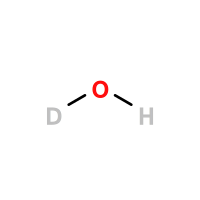

In [25]:
smile('[H]O[2H]')

#  OpenSmi的语法规范与Daylight的语法规范是不是有差别??

转换战场: [OpenSMILES specification](http://opensmiles.org/opensmiles.html)

In [26]:
KK2

'文档终止位'